**Parte 2: Python e Integração com Banco de Dados**
> Neste curso, vamos utilizar o SGBD SQLite.

> O SQLite é um sistema de gerenciamento de banco de dados leve, que usa arquivos para armazenar os dados.
Dessa forma, não é necessário instalar um servidor para usá-lo, o que o torna ideal para pequenos projetos ou demonstrações.
>
> Por padrão, o módulo do sqlite já vem instalado no ambiente Python para versões acima de 2.7.


> Importe a biblioteca do sqlite3 para começar

```import sqlite3```

> Como o sqlite trabalha com banco de dados em arquivos, para abrir uma conexão, basta informar o nome do arquivo desejado.
>
> Caso o arquivo não exista, ele será criado. Caso contrário, será aberta uma conexão com o arquivo existente.

```
conexao = sqlite3.connect('meu_banco.bd')
```

> Além de uma conexão, precisaremos do que chamamos de `cursor` para conseguir executar comandos SQL nesse banco.

```
cursor = conexao.cursor()
```

> Como já possuímos acesso ao banco de dados, podemos começar criando uma tabela de exemplo nele.
> Vamos definir o código SQL para criar a tabela de exemplo.
```
comando_sql = """
CREATE TABLE IF NOT EXISTS clientes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome TEXT NOT NULL,
    idade INTEGER,
    email TEXT UNIQUE NOT NULL
);
"""
```

> Agora, vamos executar o comando SQL acima em nosso banco de dados usando a função `execute()` do cursor.
```
cursor.execute(comando_sql)
```

> Agora que já possuímos a tabela, podemos inserir dados nela usando o statement `INSERT` do SQL.
> Como já vimos como executar UMA query no banco de dados, agora veremos como executar várias inserções a partir de uma lista de tuplas.
>
> Vamos criar uma lista de tuplas, onde cada tupla contém as informações de um cliente.
```
clientes = [
    ('Maria', 30, 'maria@example.com'),
    ('João', 25, 'joao@example.com'),
    ('Ana', 40, 'ana@example.com')
]
```

> Agora, criamos a query e passamos a lista de tuplas para a função `executemany()` do cursor.
> Observe que, na query, utilizamos o caractere `?` no lugar dos valores a serem inseridos. Essa é uma prática recomendada para evitar ataques de injeção de SQL. Cada `?` será substituído pelo respectivo valor de cada cliente pelo cursor.

```
cursor.executemany("INSERT INTO clientes (nome, idade, email) VALUES (?, ?, ?)", clientes)
```

> Tem um detalhe importante aqui. Após cada comando de `INSERT` ou `UPDATE`, precisamos dizer ao SGBD que já terminamos, para que ele possa, de fato, gravar os dados no banco de dados. Para isso, usa-se a função `commit()` da conexão. Se isso não for feito, as alterações só estarão visíveis para a conexão atual ao SGBD. Outras conexões, que podem estar ocorrendo em outros scripts ou usuários do SGBD não conseguirão ver as alterações.
> 
> Cada operação no banco de dados é chamada de `TRANSACTION`, ou seja, uma transação. Os SGBDs atuais fazem o controle de transações para garantir a consistência dos dados, principalmente considerando que operações paralelas são comuns. Caso queira ler mais sobre, veja este [link](https://pt.wikipedia.org/wiki/ACID).

```
conexao.commit()
```

> Agora vamos verificar se os dados foram inseridos no banco de dados corretamente. Para isso, fazemos um `SELECT` de todos os registros da tabela `clientes`
>
> A função `fetchall()` do cursor pede ao SGBD que todos os registros retornados na query sejam retornados para o script. Outras opções são `fetchone()` para obter somente uma linha do resultado ou `fetchmany(n)` para obter `n` linhas do resultado.
>
> Atribuímos o retorno da chamada ao `fetchall()` a uma variável e imprimimos cada elemento.


```
cursor.execute("SELECT * FROM clientes")
clientes = cursor.fetchall()
for cliente in clientes:
    print(cliente)
```

(1, 'Maria', 30, 'maria@example.com')
(2, 'João', 25, 'joao@example.com')
(3, 'Ana', 40, 'ana@example.com')


> A partir de agora, vamos trabalhar com o modelo do banco de dados que criamos no nosso [curso anterior](https://www.youtube.com/watch?v=S6lWIfedLH0).
>
> O banco foi modelado para representar clientes, produtos e compras desses produtos feitas pelos clientes. O modelo lógico é apresentado a seguir.
![image](bd_compras_modelo.png)


> O modelo físico (script SQL) está contido no arquivo [bd_compras_modelo.sql](bd_compras_modelo.sql). Ele também contém alguns dados de exemplos para serem carregados no banco.


> Vamos começar criando uma nova conexão para um novo banco de dados sqlite.

```
conexao = sqlite3.connect('bd_compras.db')
cursor = conexao.cursor()
```

> Agora vamos importar o script em nosso código e depois aplicá-lo ao novo banco de dados.

```
arquivo_sql = open('bd_compras_modelo.sql', 'r')
sql = arquivo_sql.read()
cursor.executescript(sql)
```


> Verificando se os dados foram inseridos corretamente.
>
> 
```
cursor.execute("SELECT * FROM cliente")
clientes = cursor.fetchall()
print('Clientes:')
for cliente in clientes:
    print(cliente)

cursor.execute("SELECT * FROM produto")
produtos = cursor.fetchall()
print('Produtos:')
for produto in produtos:
    print(produto)

cursor.execute("SELECT * FROM compra INNER JOIN cliente on compra.codcliente=cliente.codigocliente")
compras = cursor.fetchall()
print('Compras:')
for compra in compras:
    print(compra)
```

Clientes:
('Heleno', '21 99999 9999', 1)
('Maria', '21 88888 8888', 2)
('Marcela', '21 77777 7777', 3)
('Carlos', '21 66666 6666', 4)
('Ana', '21 55555 5555', 5)
('João', '21 44444 4444', 6)
('Laura', '21 33333 3333', 7)
('Paulo', '21 22222 2222', 8)
Produtos:
('Ovo', 1.0, 1)
('Óleo', 5.0, 2)
('Farinha', 5.9, 3)
('Arroz', 3.5, 4)
('Feijão', 4.5, 5)
('Macarrão', 2.5, 6)
('Açúcar', 2.9, 7)
('Sal', 1.2, 8)
Compras:
('17/06/2024', 15.9, 1, 1, 'Heleno', '21 99999 9999', 1)
('17/06/2024', 1.0, 1, 2, 'Heleno', '21 99999 9999', 1)
('18/06/2024', 7.0, 2, 3, 'Maria', '21 88888 8888', 2)
('18/06/2024', 4.5, 3, 4, 'Marcela', '21 77777 7777', 3)
('18/06/2024', 20.0, 4, 5, 'Carlos', '21 66666 6666', 4)
('18/06/2024', 53.2, 5, 6, 'Ana', '21 55555 5555', 5)
('18/06/2024', 34.9, 6, 7, 'João', '21 44444 4444', 6)


> Agora vamos testar cada tipo de query nesse banco.


> `INSERT`
> 
> Vamos ver um exemplo sem utilizar o modo recomendado e depois o modo recomendado.
```
# modo não recomendado
cursor.execute("INSERT INTO cliente (nome, telefone) VALUES ('Clodoaldo', '21 12345 6789')");

# modo recomendado
cursor.execute("INSERT INTO cliente (nome, telefone) VALUES (?, ?)", ('Josefina', '11 98765 4321') );

conexao.commit()
cursor.execute("SELECT * FROM cliente")
clientes = cursor.fetchall()
print('Clientes:')
for cliente in clientes:
    print(cliente)
```

Clientes:
('Heleno', '21 99999 9999', 1)
('Maria', '21 88888 8888', 2)
('Marcela', '21 77777 7777', 3)
('Carlos', '21 66666 6666', 4)
('Ana', '21 55555 5555', 5)
('João', '21 44444 4444', 6)
('Laura', '21 33333 3333', 7)
('Paulo', '21 22222 2222', 8)
('Clodoaldo', '21 12345 6789', 9)
('Josefina', '11 98765 4321', 10)


> Para atualizar algum dado existente utilizamos o `UPDATE`

```
cursor.execute("UPDATE cliente SET telefone = ? WHERE nome = ?", ('21 99888 9988', 'Heleno'))
conexao.commit()

print('Clientes:')
for cliente in clientes:
    print(cliente)
```

Clientes:
('Heleno', '21 99999 9999', 1)
('Maria', '21 88888 8888', 2)
('Marcela', '21 77777 7777', 3)
('Carlos', '21 66666 6666', 4)
('Ana', '21 55555 5555', 5)
('João', '21 44444 4444', 6)
('Laura', '21 33333 3333', 7)
('Paulo', '21 22222 2222', 8)
('Clodoaldo', '21 12345 6789', 9)
('Josefina', '11 98765 4321', 10)


> Reparou que ao executar o código acima, o telefone do cliente `Heleno` não foi atualizado?

> Na verdade, foi atualizado sim. Mas estamos iterando sobre a lista de `clientes` recuperada do banco de dados antes da atualização. Precisamos recuperar as informações atualizadas.
```
cursor.execute("SELECT * FROM cliente")
clientes = cursor.fetchall()
print('Clientes:')
for cliente in clientes:
    print(cliente)
```

Clientes:
('Heleno', '21 99888 9988', 1)
('Maria', '21 88888 8888', 2)
('Marcela', '21 77777 7777', 3)
('Carlos', '21 66666 6666', 4)
('Ana', '21 55555 5555', 5)
('João', '21 44444 4444', 6)
('Laura', '21 33333 3333', 7)
('Paulo', '21 22222 2222', 8)
('Clodoaldo', '21 12345 6789', 9)
('Josefina', '11 98765 4321', 10)


> Outra opção é recuperar somente o cliente que queremos verificar. No caso, o cliente de nome `Heleno`.
```
cursor.execute("SELECT * from cliente WHERE nome = ? ", ("Heleno",) )
print(cursor.fetchone())
```

('Heleno', '21 99888 9988', 1)


> Para apagar registros do banco de dados, usamos o statement SQL `DELETE`
```
cursor.execute("SELECT * from cliente WHERE nome = ? ", ("Ana",) )
print(cursor.fetchone())

cursor.execute("DELETE FROM cliente WHERE nome = ?", ('Ana',))
conexao.commit()

cursor.execute("SELECT * from cliente WHERE nome = ? ", ("Ana",) )
print(cursor.fetchone())
```

('Ana', '21 55555 5555', 5)
None


> Para trabalhar com análise de dados vindos do banco de dados, pode ser interessante utilizar a biblioteca Pandas.
> Para quem não tem familiaridade com a biblioteca, sugerimos que façam os cursos anteriores: [Jupyter Notebooks](https://www.youtube.com/watch?v=CaPMY5D2aPg) e [21ª SNCT | Análise de Dados: incidência de dengue no Brasil](https://www.youtube.com/watch?v=nliDqD81rAI).

```
import pandas as pd

df_clientes = pd.read_sql_query("SELECT * FROM cliente", conexao)
print("Dados carregados em um DataFrame:")
df_clientes
```

,nome,telefone,codigocliente
0,Heleno,21 99888 9988,1
1,Maria,21 88888 8888,2
2,Marcela,21 77777 7777,3
3,Carlos,21 66666 6666,4
4,João,21 44444 4444,6
5,Laura,21 33333 3333,7
6,Paulo,21 22222 2222,8
7,Clodoaldo,21 12345 6789,9
8,Josefina,11 98765 4321,10


> Outro exemplo, agora com uma query mais elaborada
```
df_compras = pd.read_sql_query("SELECT nome, telefone, data, valor FROM compra INNER JOIN cliente on compra.codcliente=cliente.codigocliente", conexao)
df_compras
```

,nome,telefone,data,valor
0,Heleno,21 99888 9988,17/06/2024,15.9
1,Heleno,21 99888 9988,17/06/2024,1.0
2,Maria,21 88888 8888,18/06/2024,7.0
3,Marcela,21 77777 7777,18/06/2024,4.5
4,Carlos,21 66666 6666,18/06/2024,20.0
5,João,21 44444 4444,18/06/2024,34.9


> Durante o processo de análise de dados, uma atividade recorrente após fazer o tratamento em dados recuperados do banco de dados é salvar uma cópia desses dados tratados.
> Uma opção é salvar em arquivos csv. Para isso, basta usar a função do Pandas `.to_csv()`. O argumento `index=False` serve para não guardar o índice de cada linha no csv.
```
df_compras.to_csv('compras.csv', index=False)
```

> Suponha que queiramos criar um gráfico para visualizar quem foram os clientes que mais gastaram.
>
> Primeiro, vamos agrupar o dataframe de compras por nome e somar o valor das compras de cada cliente.
> Depois, vamos ordenar do maior para o menor valor.
```
df_analysis = df_compras.groupby('nome').agg(
    valor_gasto=('valor', 'sum')
).reset_index().sort_values('valor_gasto', ascending=False)
df_analysis
```

,nome,valor_gasto
2,João,34.9
0,Carlos,20.0
1,Heleno,16.9
4,Maria,7.0
3,Marcela,4.5


> Agora importaremos o matplotlib e criaremos uma visualização desse dado utilizando um gráfico de barras.
```
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(df_analysis['nome'], df_analysis['valor_gasto'])
plt.xlabel('Valor gasto')
plt.ylabel('Cliente')
plt.title('Valores gastos pelos clientes')
plt.show()
```

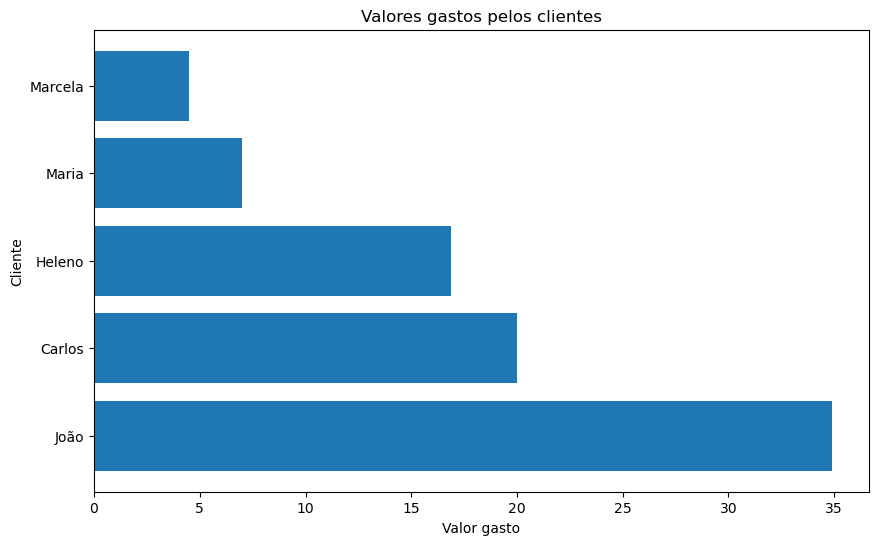

> Por fim, vamos fechar a conexão com o banco de dados.
```
conexao.close()
```